In [1]:
# install cairo : https://www.cairographics.org/download/
# pip install pycairo
# pip install igraph

import pandas as pd
import numpy as np

import igraph as ig

import matplotlib.pyplot as plt

## Igraph 



### Basic concepts

In [2]:
# Create graph
g = ig.Graph(n=6, edges=[(0, 1), (0, 2), (2,3), (2,4), (3,4), (1,5)])

In [3]:
# Pring number of nodes and all edges
print(g)

IGRAPH U--- 6 6 --
+ edges:
0--1 0--2 2--3 2--4 3--4 1--5


In [4]:
# Print only number of nodes and number od edges
ig.summary(g)

IGRAPH U--- 6 6 -- 


In [5]:
# Add new vertice
g.add_vertices(1)
print(g)

IGRAPH U--- 7 6 --
+ edges:
0--1 0--2 2--3 2--4 3--4 1--5


In [6]:
# Add edges
g.add_edges([(0, 6), (0,5), (5,6), (1,6)])
print(g)

IGRAPH U--- 7 10 --
+ edges:
0 -- 1 2 5 6   2 -- 0 3 4     4 -- 2 3       6 -- 0 1 5
1 -- 0 5 6     3 -- 2 4       5 -- 0 1 6


In [7]:
# Check if graph is weighted (if different edges carry different weights)
g.is_weighted()

False

In [8]:
# Check if graph is directed
g.is_directed()

False

In [ ]:
g.es

In [ ]:
g.vs

In [9]:
# Add names to the graph
g.vs["name"] = ["Harold", "Iris", "Jack", "Karen", "Leo", "Molly", "Mike"]

In [10]:
# g.vs can be used for adding random metadata to vertices
g.vs['height'] = [170, 175, 180, 165, 178, 160, 182]
g.vs['color'] = ["red", "green", "blue", "yellow", "purple", "orange", "pink"]

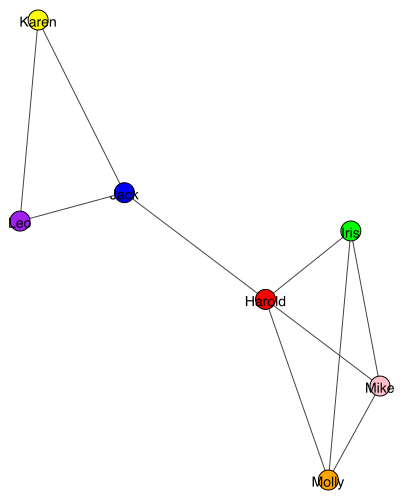

In [11]:
layout = g.layout("fruchterman_reingold")
ig.plot(g, layout=layout, vertex_label=g.vs["name"], bbox=(0, 0, 400, 500))

In [12]:
g.get_adjacency()

Matrix([[0, 1, 1, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, 0], [1, 1, 0, 0, 0, 0, 1], [1, 1, 0, 0, 0, 1, 0]])

In [13]:
# Adjacency matrix as data frame
adj_mtx = pd.DataFrame(g.get_adjacency(),columns=g.vs["name"], index=g.vs["name"])
adj_mtx

,Harold,Iris,Jack,Karen,Leo,Molly,Mike
Harold,0,1,1,0,0,1,1
Iris,1,0,0,0,0,1,1
Jack,1,0,0,1,1,0,0
Karen,0,0,1,0,1,0,0
Leo,0,0,1,1,0,0,0
Molly,1,1,0,0,0,0,1
Mike,1,1,0,0,0,1,0


In [14]:
g.get_edgelist()

[(0, 1),
 (0, 2),
 (2, 3),
 (2, 4),
 (3, 4),
 (1, 5),
 (0, 6),
 (0, 5),
 (5, 6),
 (1, 6)]

In [15]:
# Edge pairs as dataframe + name mapping
name_map = pd.Series(g.vs['name'])
edge_df = pd.DataFrame(g.get_edgelist(), columns=['Node 1', 'Node 2'])
edge_df['Node 1'] = edge_df['Node 1'].map(name_map)
edge_df['Node 2'] = edge_df['Node 2'].map(name_map)

edge_df['weight'] = 1
edge_df

,Node 1,Node 2,weight
0,Harold,Iris,1
1,Harold,Jack,1
2,Jack,Karen,1
3,Jack,Leo,1
4,Karen,Leo,1
5,Iris,Molly,1
6,Harold,Mike,1
7,Harold,Molly,1
8,Molly,Mike,1
9,Iris,Mike,1


In [16]:
# Node degrees
degrees = g.degree()
degrees_series = pd.Series(degrees, index=g.vs["name"])
degrees_series

Harold    4
Iris      3
Jack      3
Karen     2
Leo       2
Molly     3
Mike      3
dtype: int64

In [17]:
g.es['weight'] = [1, 0.5, 1, 0.5, 0.8, 0.3, 0.6, 0.7, 0.8]

In [18]:
# Weighted adjacency matrix
weight_adj = pd.DataFrame(g.get_adjacency('weight'), columns=g.vs["name"], index=g.vs["name"] )
weight_adj

,Harold,Iris,Jack,Karen,Leo,Molly,Mike
Harold,0.0,1.0,0.5,0.0,0.0,0.7,0.6
Iris,1.0,0.0,0.0,0.0,0.0,0.3,1.0
Jack,0.5,0.0,0.0,1.0,0.5,0.0,0.0
Karen,0.0,0.0,1.0,0.0,0.8,0.0,0.0
Leo,0.0,0.0,0.5,0.8,0.0,0.0,0.0
Molly,0.7,0.3,0.0,0.0,0.0,0.0,0.8
Mike,0.6,1.0,0.0,0.0,0.0,0.8,0.0


In [19]:
# Edge pairs as dataframe + name mapping
edge_df_weight = pd.DataFrame(g.get_edgelist(), columns=['Node 1', 'Node 2'])
edge_df_weight['Node 1'] = edge_df_weight['Node 1'].map(name_map)
edge_df_weight['Node 2'] = edge_df_weight['Node 2'].map(name_map)

edge_df_weight['weight'] = g.es['weight']
edge_df_weight

,Node 1,Node 2,weight
0,Harold,Iris,1.0
1,Harold,Jack,0.5
2,Jack,Karen,1.0
3,Jack,Leo,0.5
4,Karen,Leo,0.8
5,Iris,Molly,0.3
6,Harold,Mike,0.6
7,Harold,Molly,0.7
8,Molly,Mike,0.8
9,Iris,Mike,1.0


In [20]:
# Node degrees
degrees = g.degree()
degrees_series = pd.Series(degrees, index=g.vs["name"])
degrees_series

Harold    4
Iris      3
Jack      3
Karen     2
Leo       2
Molly     3
Mike      3
dtype: int64

In [21]:
degrees_weighted = g.strength(weights='weight')

degrees_series = pd.Series(degrees_weighted, index=g.vs["name"])
degrees_series

Harold    2.8
Iris      2.3
Jack      2.0
Karen     1.8
Leo       1.3
Molly     1.8
Mike      2.4
dtype: float64

In [22]:
g.es["label_size"] = [18]*g.ecount()

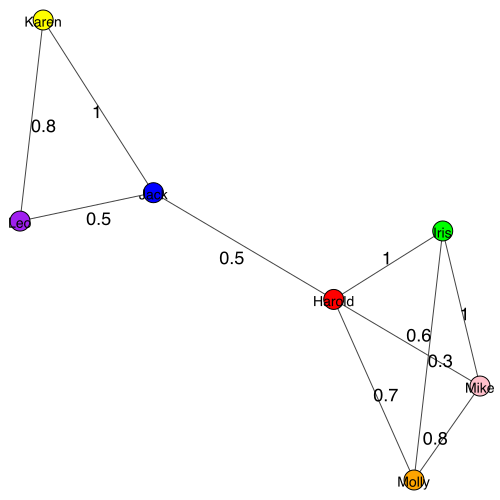

In [23]:
ig.plot(
    g, "output.png", 
    layout=layout, 
    vertex_label=g.vs["name"], 
    edge_label=g.es["weight"], 
    bbox=(500,500)
)

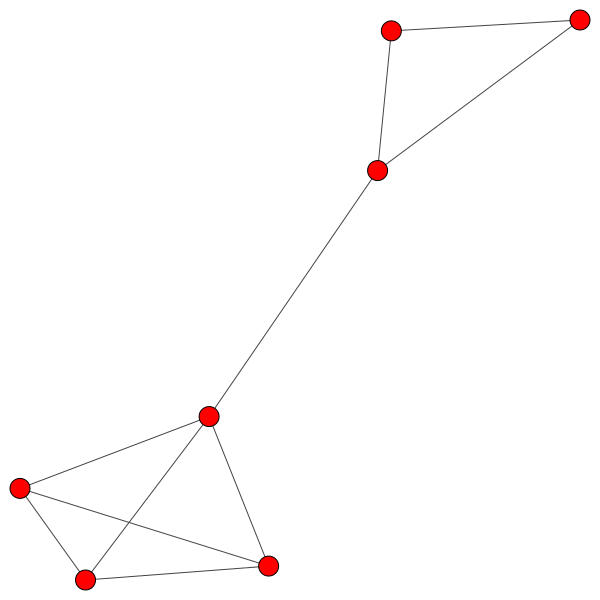

In [24]:
# We can create graph from adjacency matrix ! 
graph_1 = ig.Graph.Weighted_Adjacency(weight_adj.to_numpy(), mode='undirected')

layout = graph_1.layout("fruchterman_reingold", weights='weight')
ig.plot(graph_1, layout=layout)

### Graph layouts

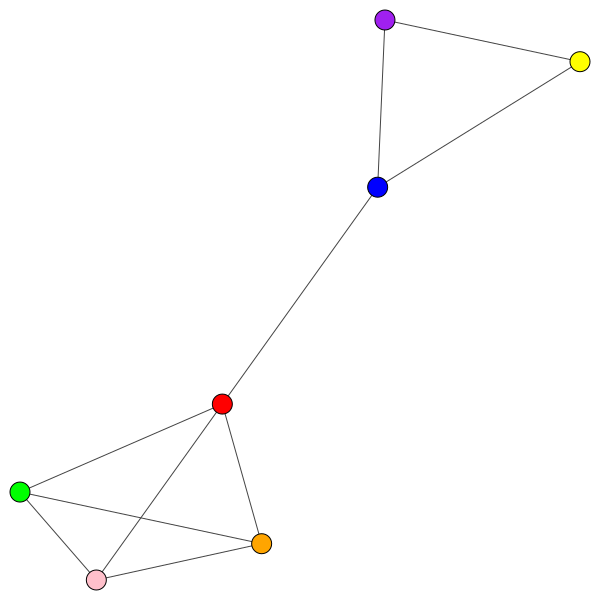

In [26]:
layout = g.layout("fruchterman_reingold")
ig.plot(g, layout=layout)

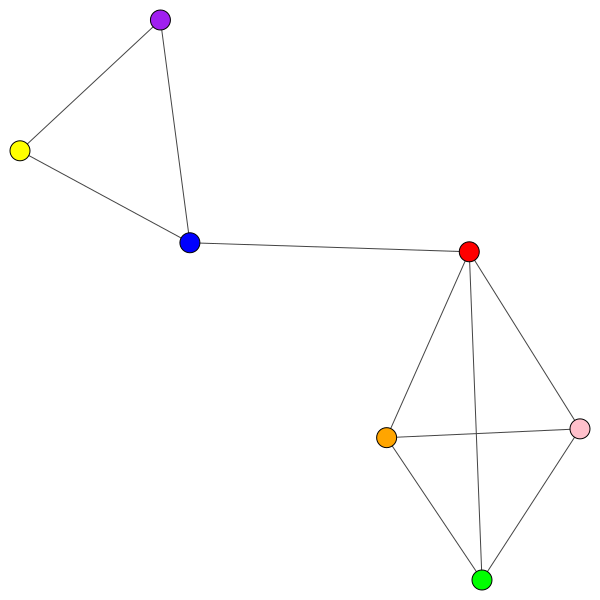

In [27]:
layout = g.layout("drl")
ig.plot(g, layout=layout)

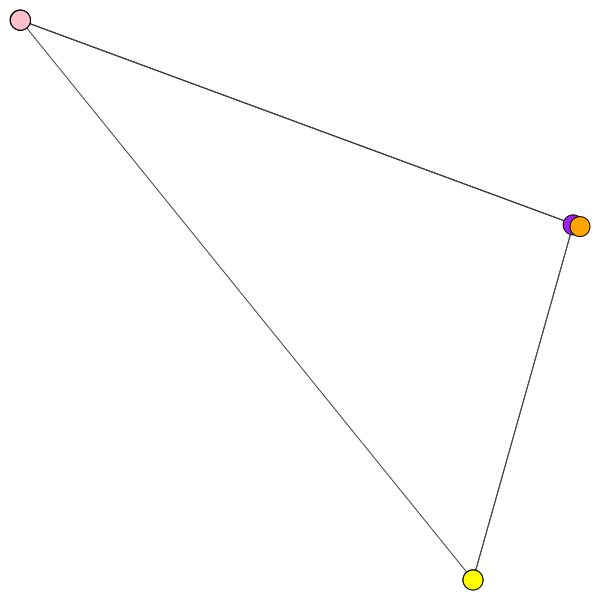

In [28]:
layout = g.layout_umap(weights=g.es['weight'], min_dist=0.4)
ig.plot(g, layout=layout)

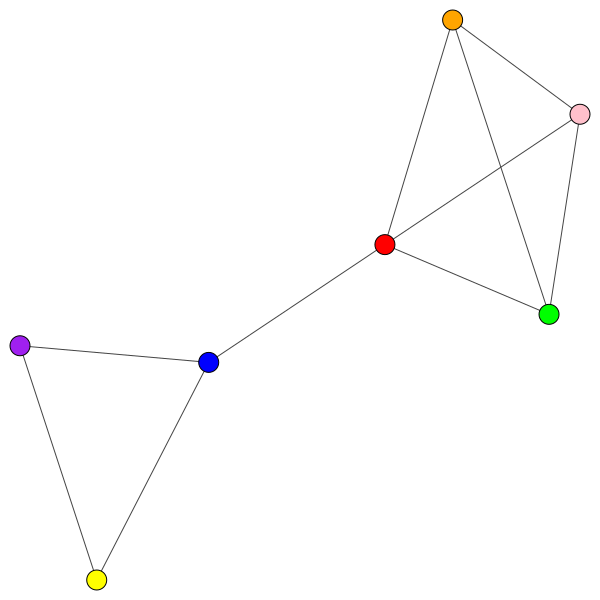

In [29]:
layout = g.layout("auto")
ig.plot(g, layout=layout)